# Heart Attack Analysis & Prediction Dataset

Endterm project. Dalabay Abylay. https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [315]:
df = pd.read_csv('heart.csv')

In [316]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [317]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Lets check is there duplicate rows

In [318]:
df[df.duplicated()] 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


drop found duplicate row

It will be more important to delete linear dependent rows in big datasets
,Cause models will overfit on data, like them

But now there is only 1 row

In [319]:
df.drop_duplicates(inplace=True)

In [320]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Shuffling data, to avoid unexpected overfitting, or other problems, that can be caused by ordered data by feature

In [321]:
df = df.sample(frac=1)

Using this countplot, we can see that data is unbalanced

After testing on this data

I will get balanced data, spliting and shuffling dataframe

And test again

<AxesSubplot:xlabel='output', ylabel='count'>

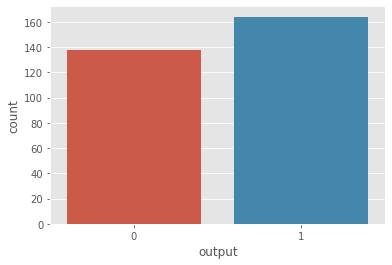

In [322]:
sns.countplot(df['output'])

In [323]:
df.shape

(302, 14)

We can see that, there is no nulls in the data

In [324]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [325]:
df.shape

(302, 14)

And no NaN values too

In [326]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 249 to 51
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [328]:
df = pd.get_dummies(df)

In [329]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0


# Data Visualization

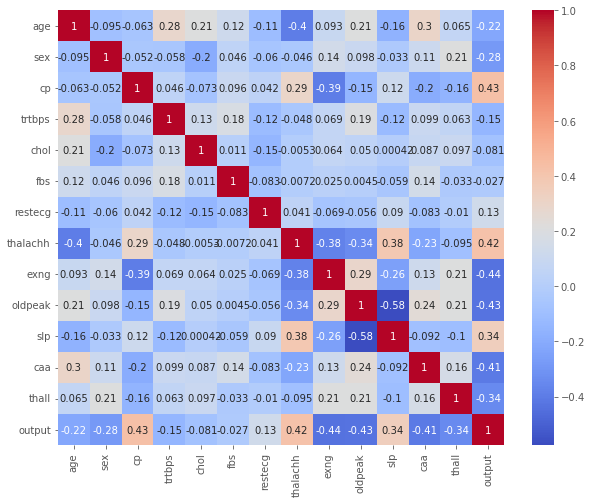

In [330]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

From looking at the heatmap, we can conclude that no pair of features correlate seriously

<AxesSubplot:title={'center':'Chest Pain type chest pain type'}, ylabel='output'>

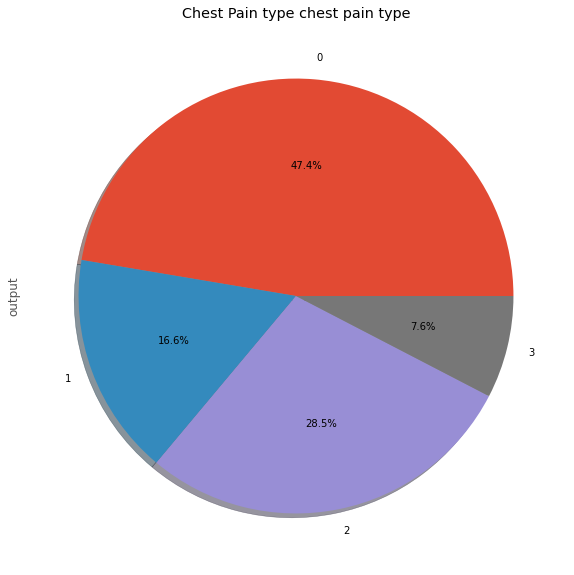

In [331]:
df.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Chest Pain type chest pain type")

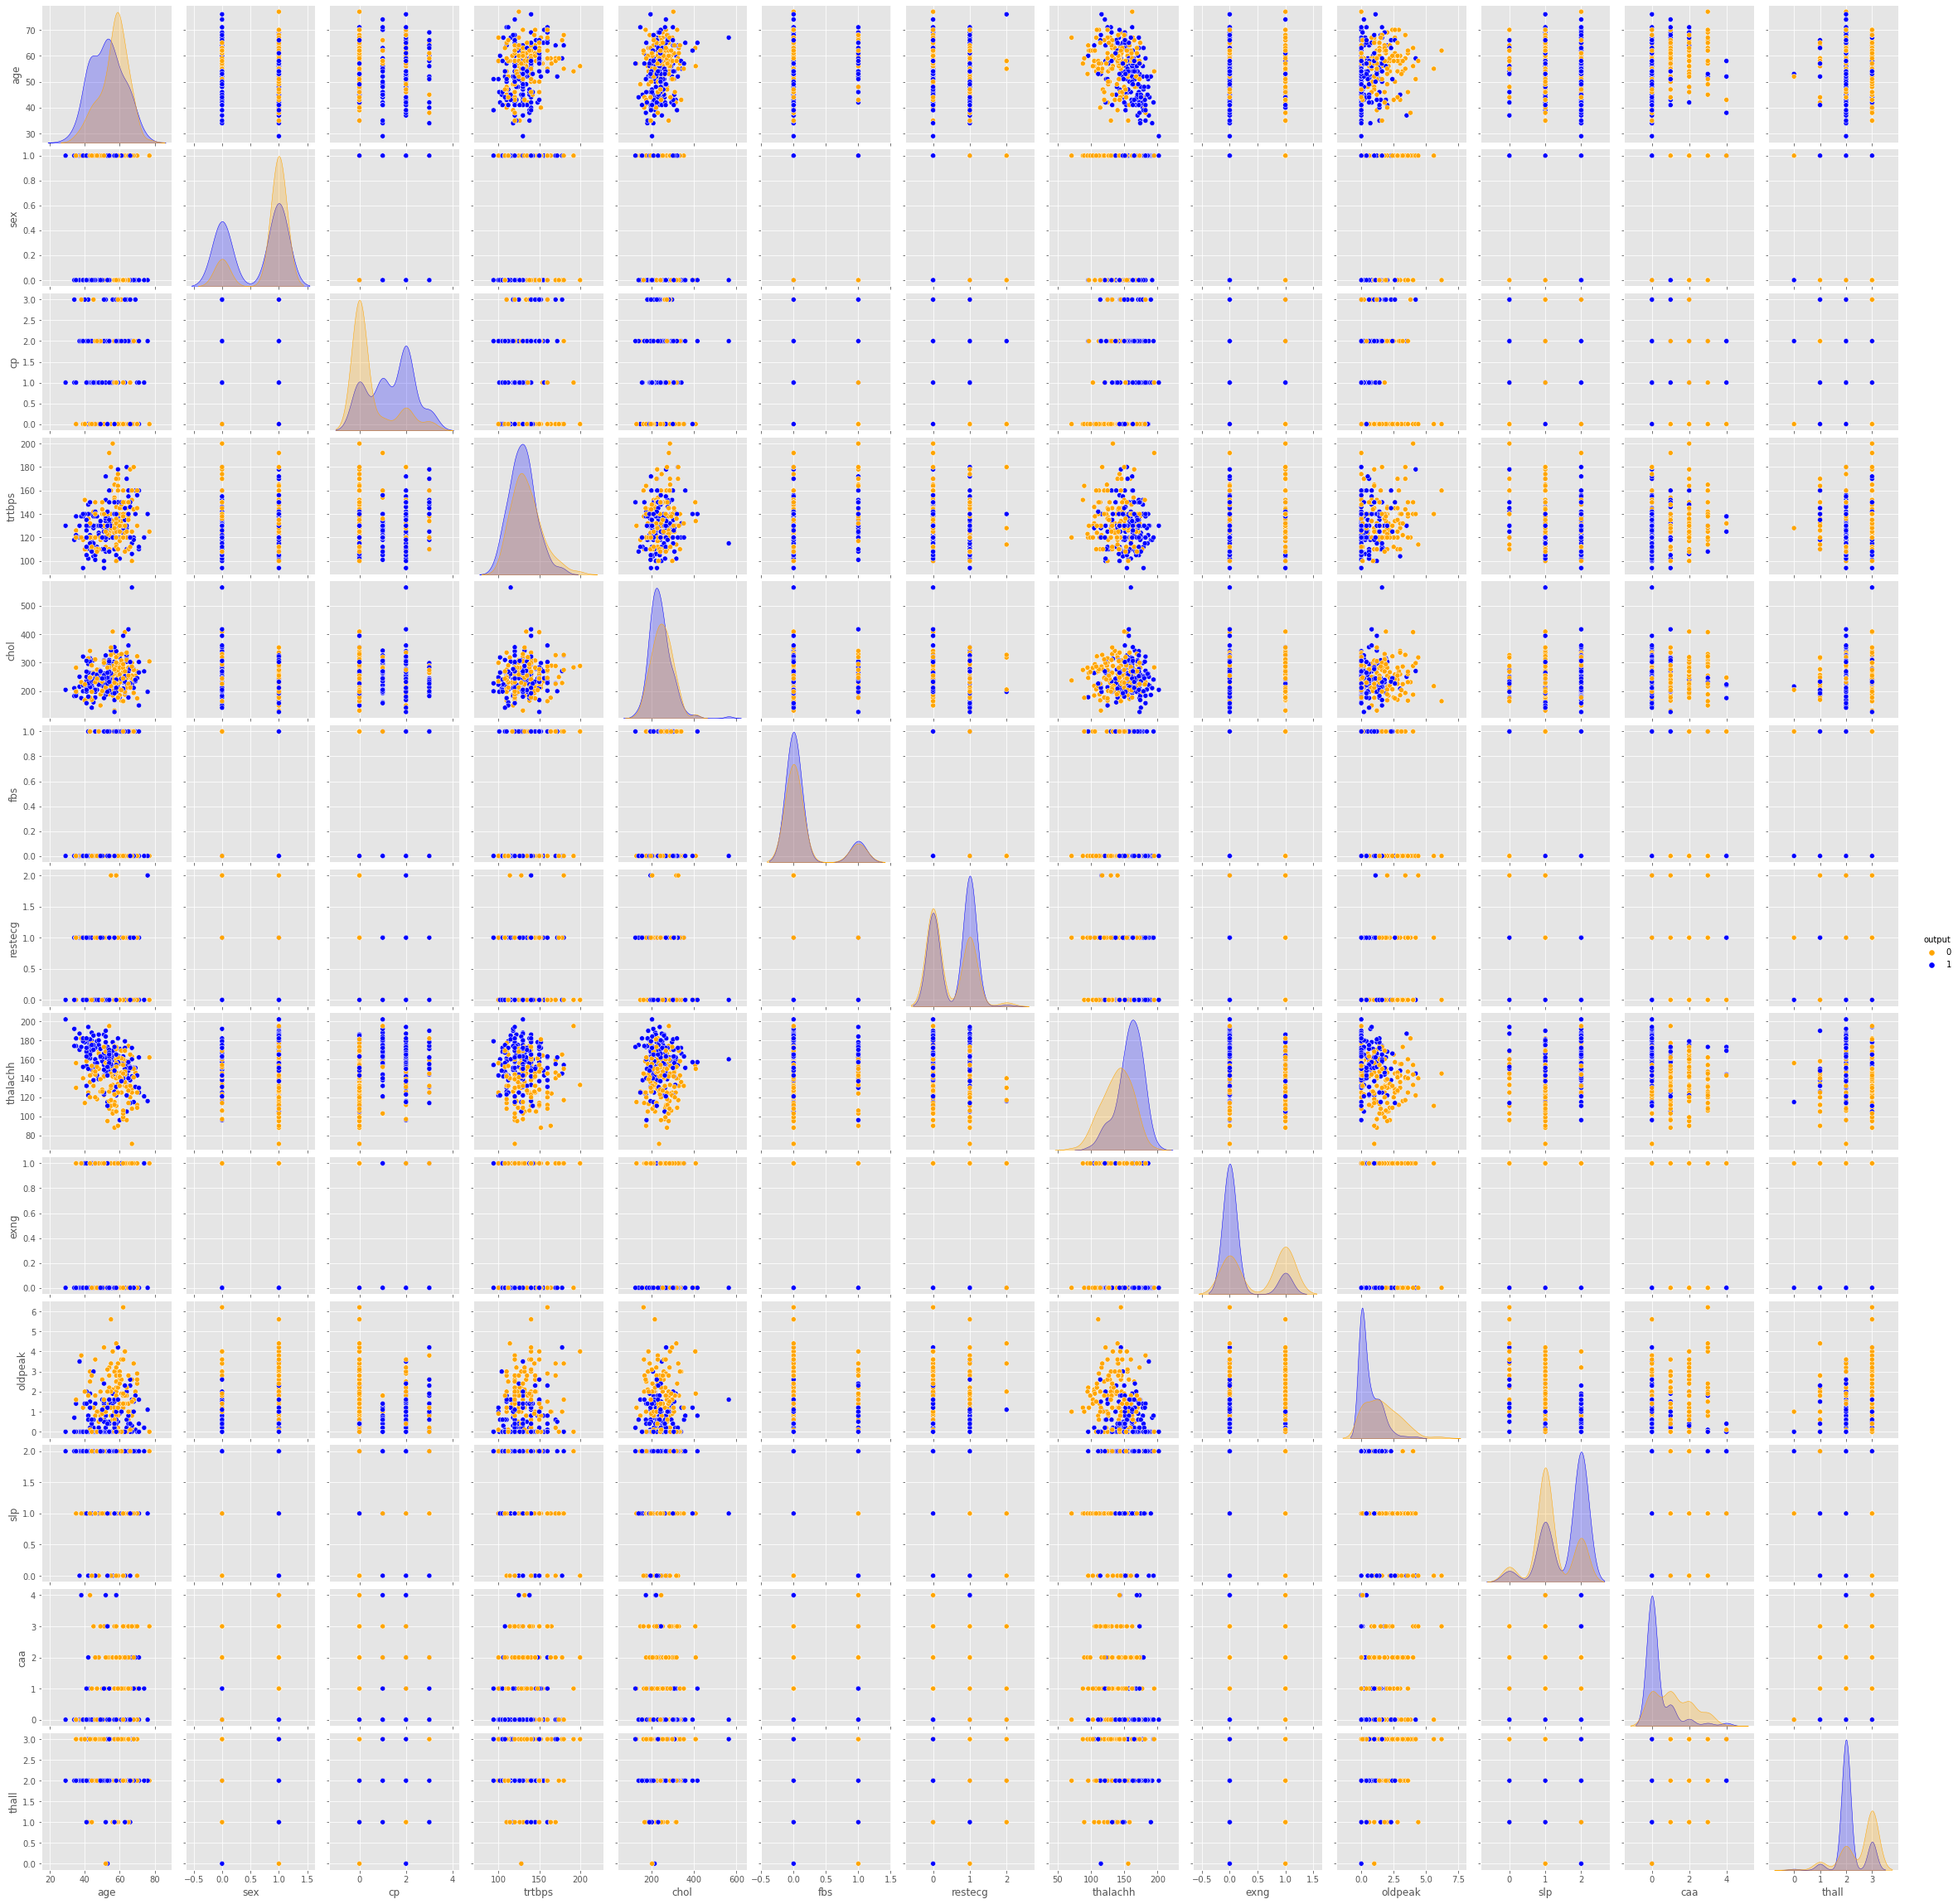

In [332]:
sns.pairplot(df,hue='output',palette = ["orange","blue"])
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

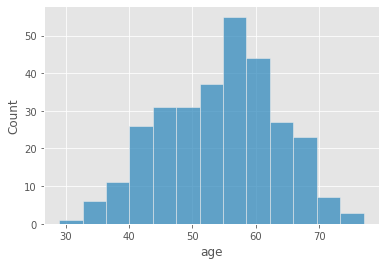

In [333]:
sns.histplot(x = "age", data=df)

The number of heart attacks distributes normally, depending on the age

In [334]:
numeric_list=['chol','age','trtbps','oldpeak','output']

selecting only numeric columns, and looking at the correlation

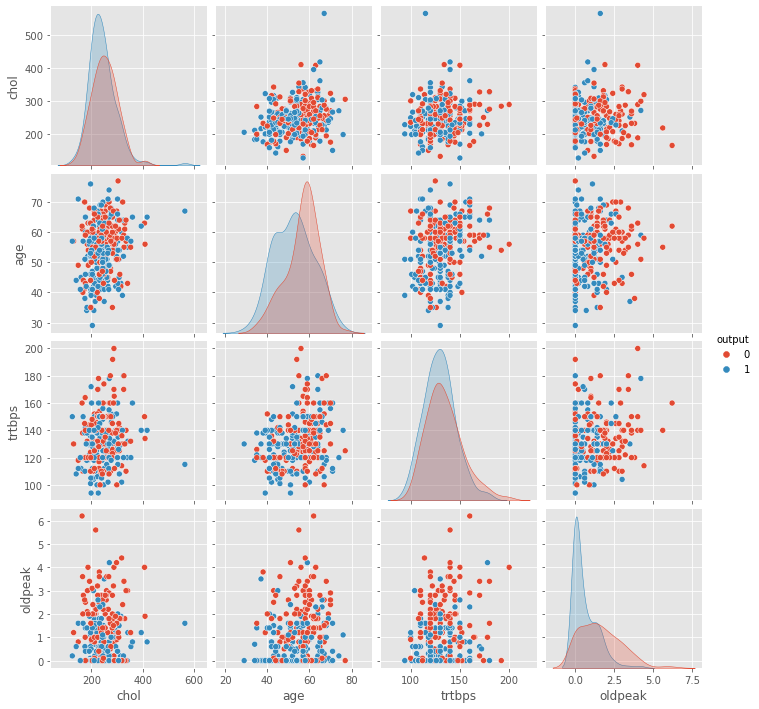

In [335]:
df_numeric=df.loc[:,numeric_list]
sns.pairplot(df_numeric,hue='output',diag_kind='kde')
plt.show()

List of categorical data

In [336]:
categorical_list=['sex','cp','fbs','restecg','exng','slp','caa','thall','output']

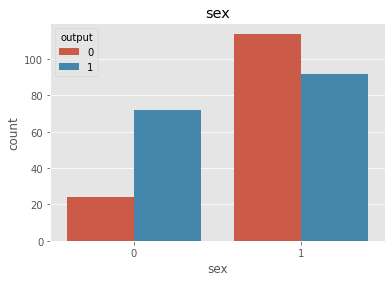

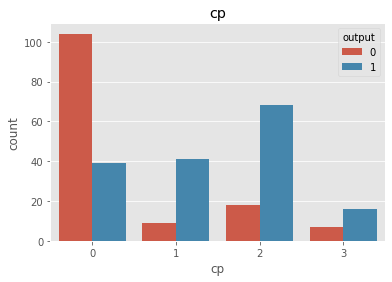

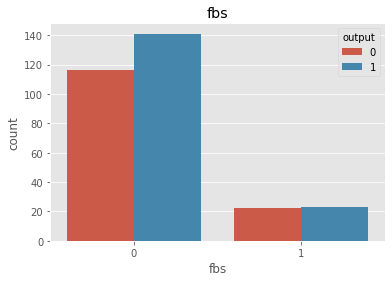

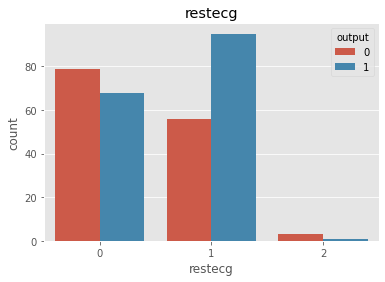

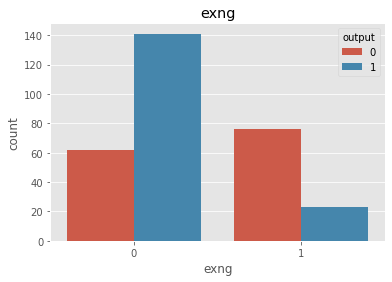

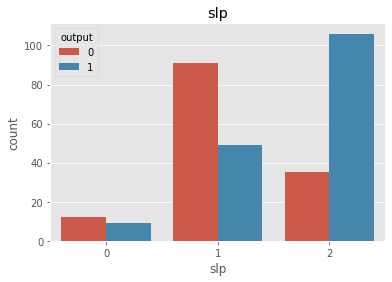

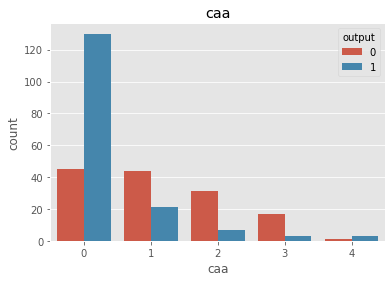

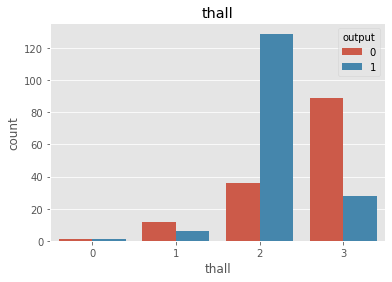

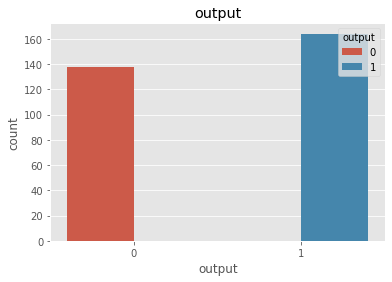

In [337]:
df_categoric=df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i,data=df_categoric,hue='output')
    plt.title(i)

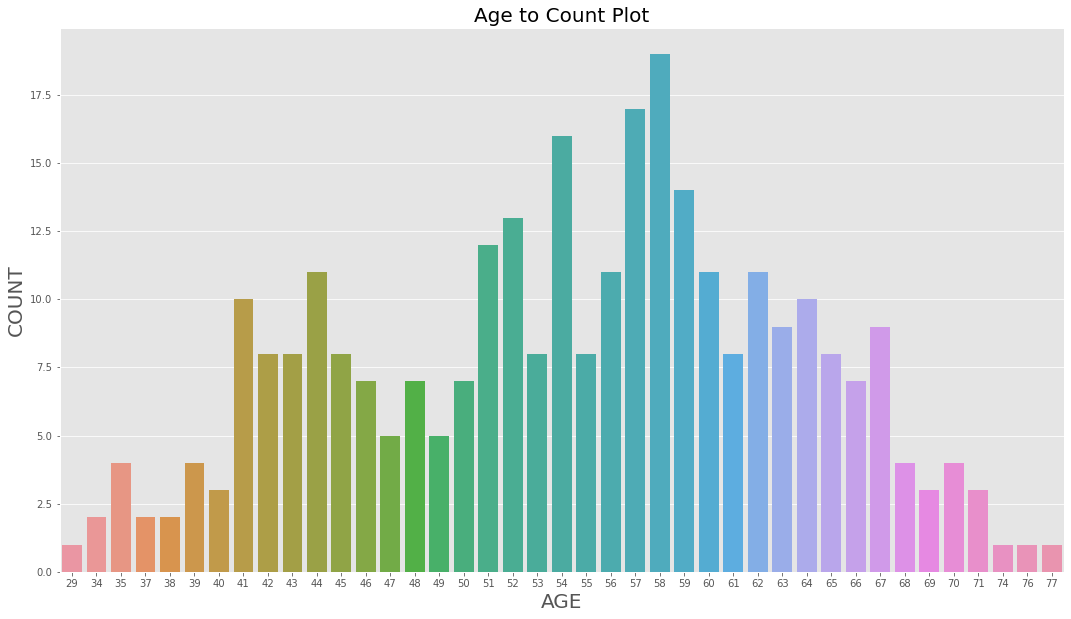

In [338]:
plt.figure(figsize=(18,10))
plt.style.use("ggplot")
sns.countplot(x=df["age"])
plt.title("Age to Count Plot",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

# Data preprocessing

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
X = df.drop(['output'], axis=1)
y = df['output']

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Decision Tree

In [342]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [343]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=10)

Classifier with custom parameters

In [344]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [345]:
print("Decision Tree accuracy: ", dt.score(X_test, y_test))

Decision Tree accuracy:  0.72


In [346]:
dt2 = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20)}

In [347]:
grid_search_cv = GridSearchCV(dt2, parameters)

Using GridSearchCV (Cross Validation) to find most optimal parameters of second model

In [348]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)})

In [349]:
print("The best estimator score: ", grid_search_cv.best_estimator_.score(X_test, y_test))

The best estimator score:  0.68


In [350]:
dt2 = grid_search_cv.best_estimator_
dt2

DecisionTreeClassifier(max_depth=4)

In [351]:
from sklearn import tree

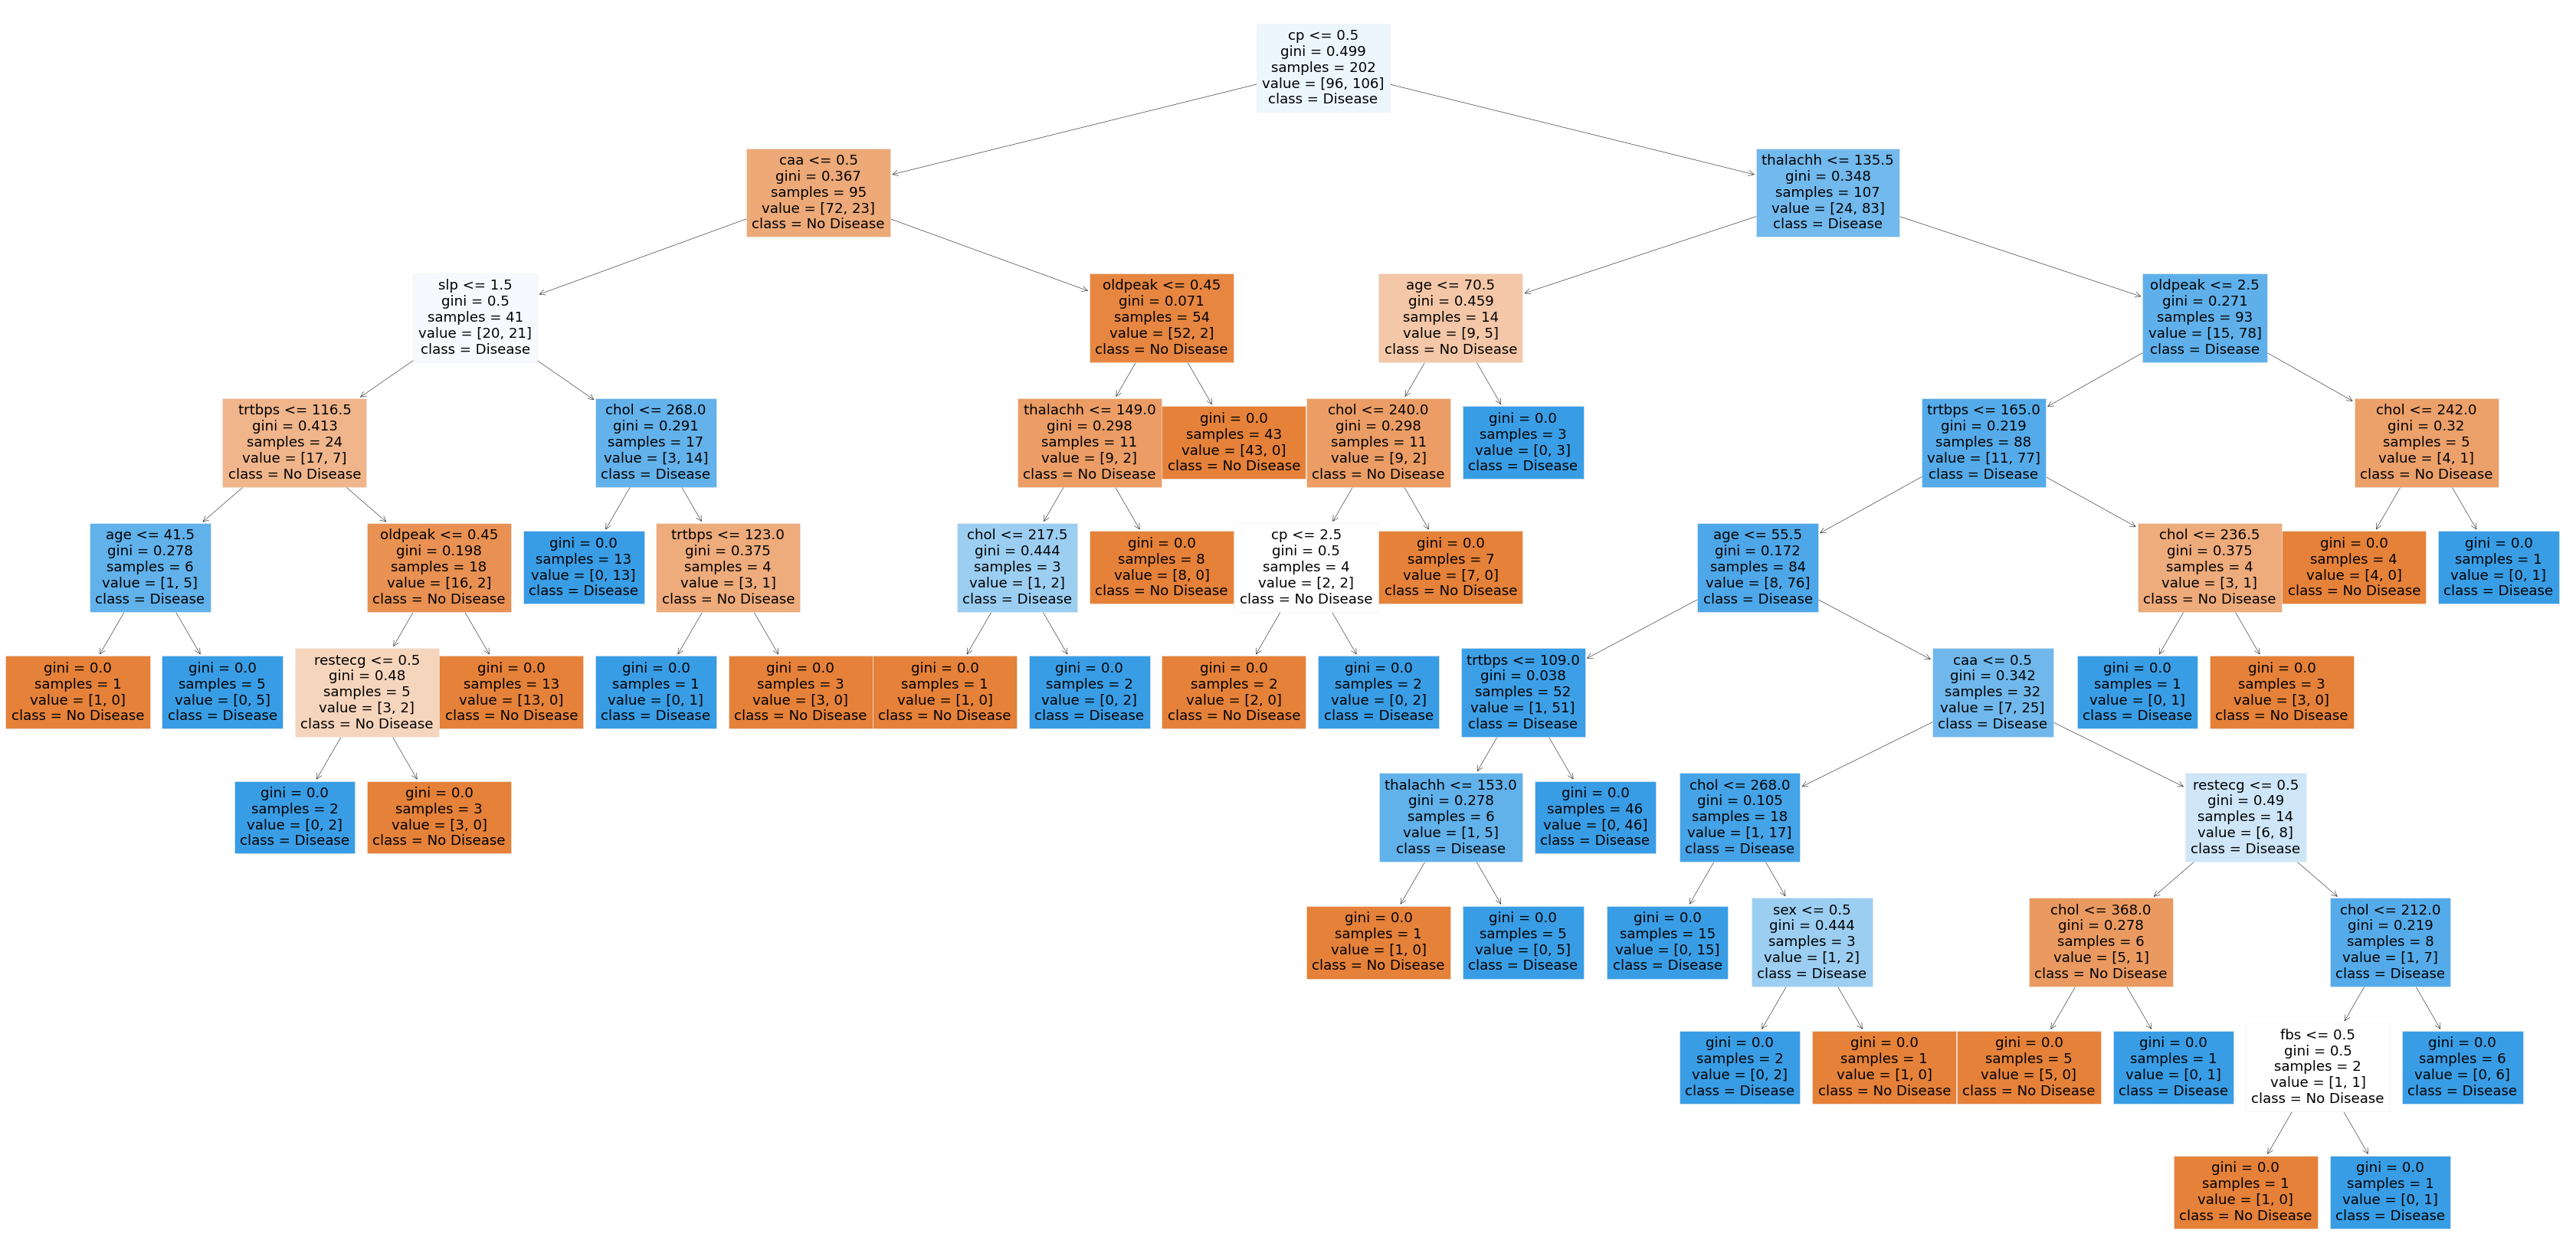

In [352]:
plt.figure(figsize=(60,30))
tree.plot_tree(dt, feature_names = X.columns, class_names=['No Disease', "Disease"], filled=True)
plt.show()

As you can see, this DecisionTree model is overfitted

Tree doesn't limited in depth, so this tree splits until it ideally fit into train set

But on the test set, this algorithm would get low score

Because model does not generalize data, it only answer correctly on the train data

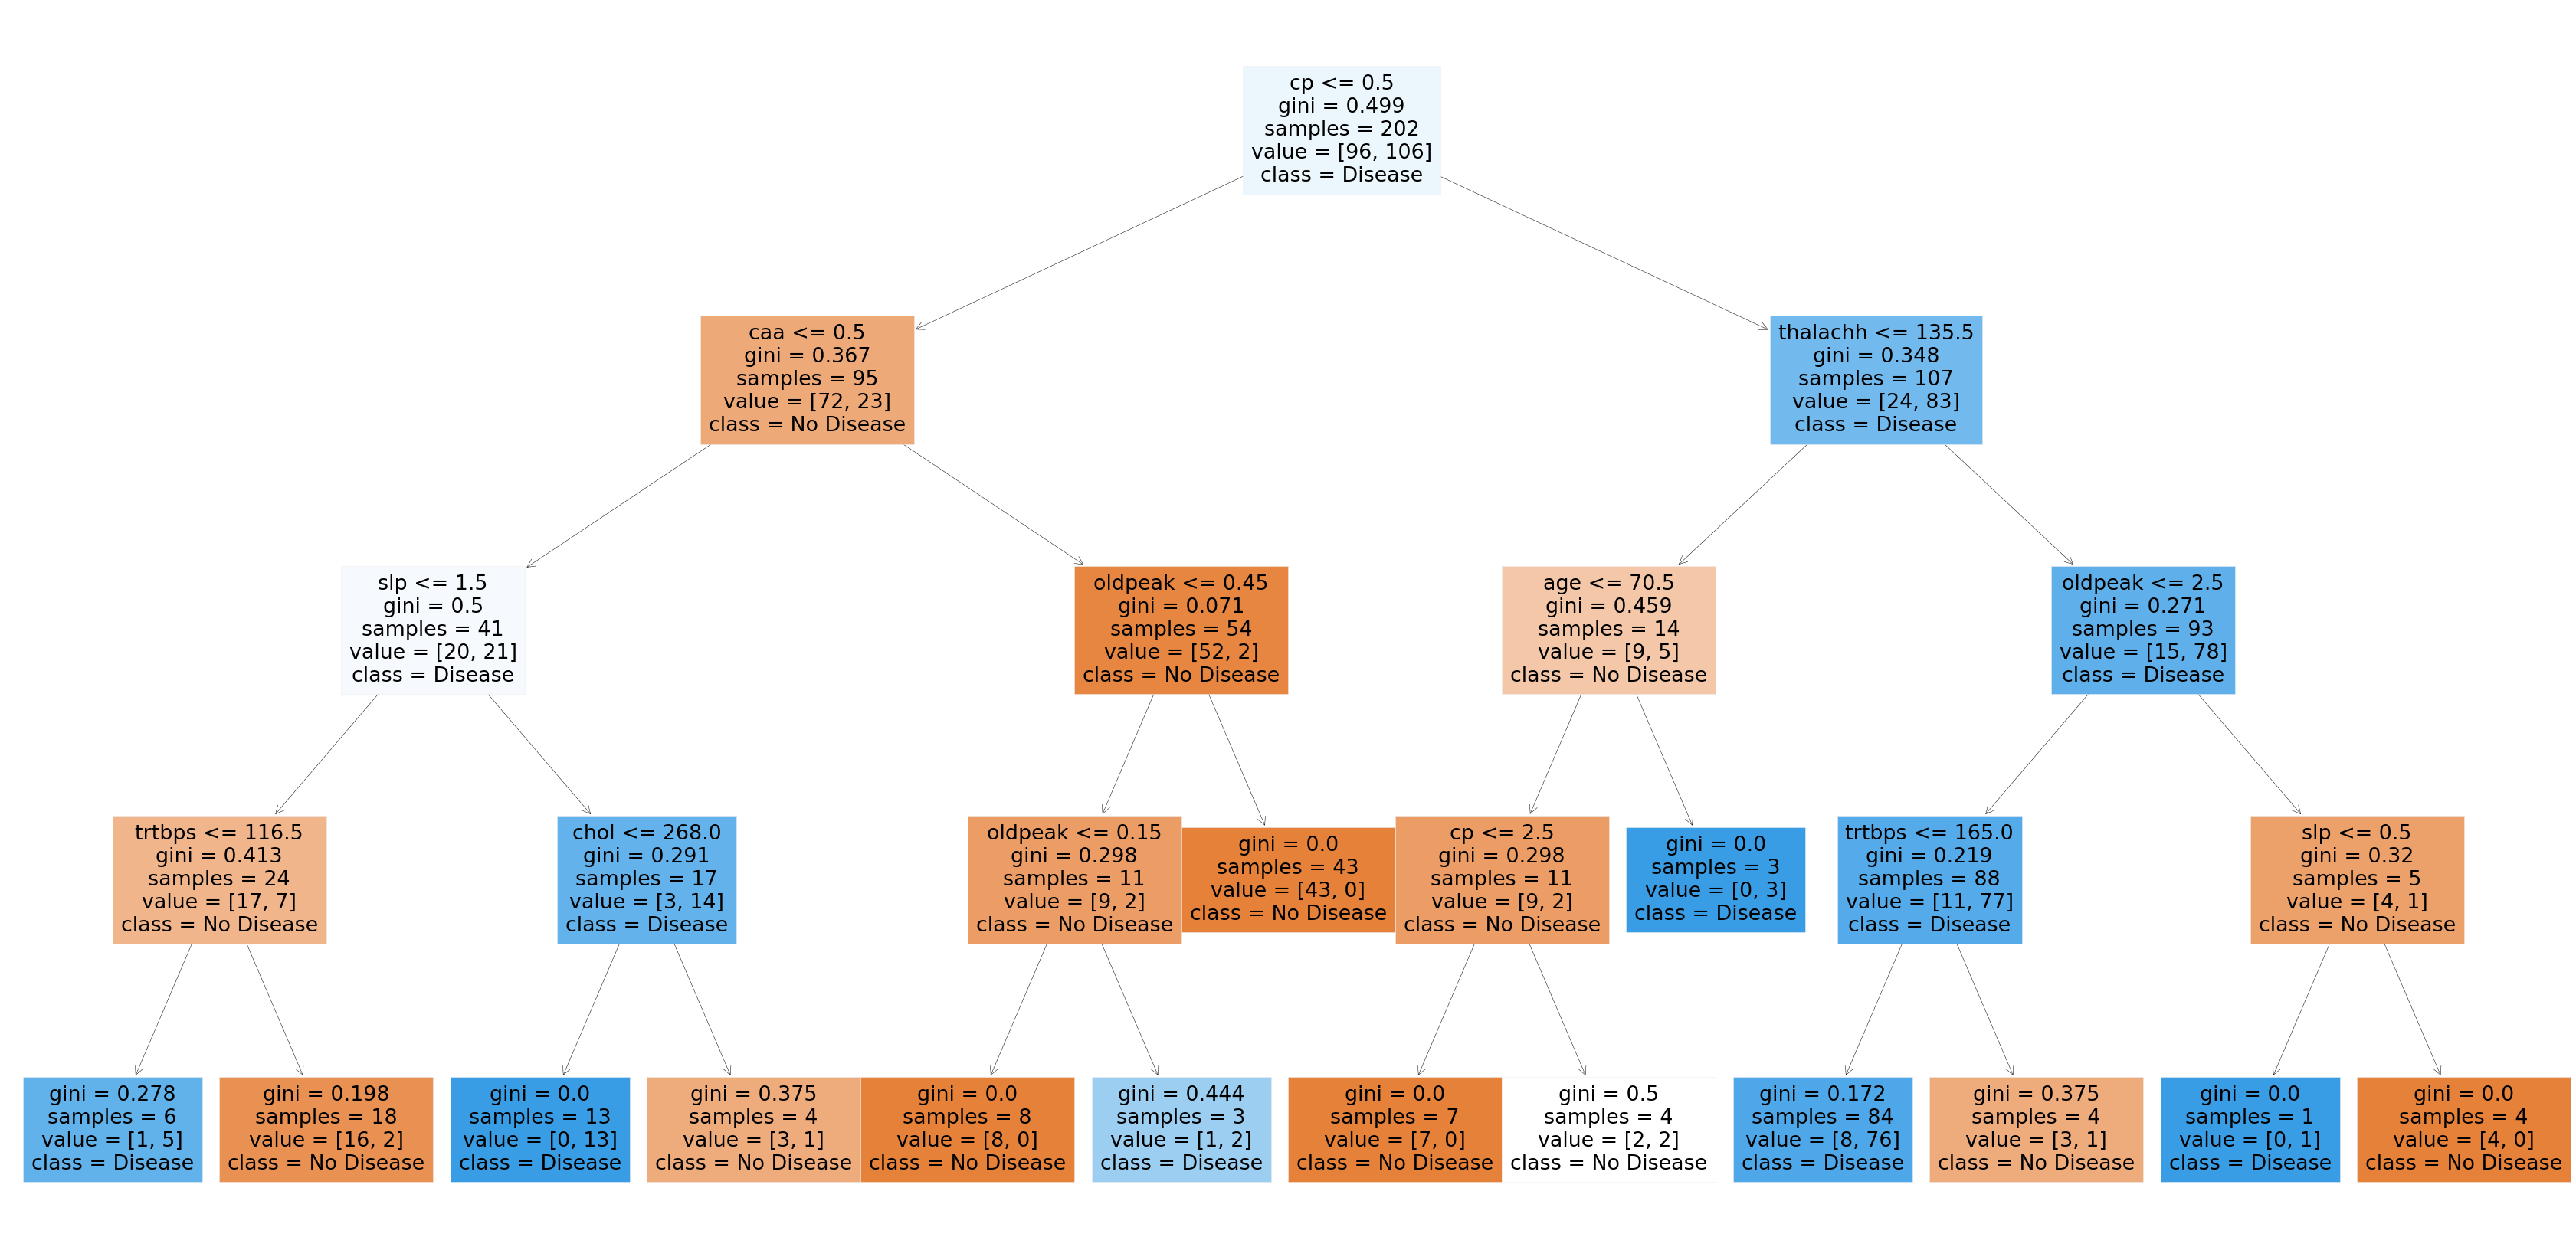

In [353]:
plt.figure(figsize=(60,30))
tree.plot_tree(dt2, feature_names = X.columns, class_names=['No Disease', "Disease"], filled=True)
plt.show()

That is the plot of the best_estimator_, found using GridSearchCV(Cross Validation)

Second tree is generalized on data

It will get some errors on train data too

But on test set, it will get good score, cause it found a pattern

In [354]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.72)

In [355]:
dt2.score(X_train, y_train), dt2.score(X_test, y_test)

(0.9207920792079208, 0.68)

accuracy_score:  0.68
f1_score:  0.7037037037037037
recall_score:  0.6551724137931034
precision_score:  0.76
----------------------------------------------
confusion_matrix: 
 


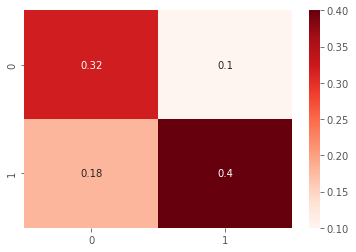

In [356]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve

pred_dt = dt.predict(X_test)
y_pred = dt2.predict(X_test)

print ('accuracy_score: ',accuracy_score(y_test,y_pred))
print ('f1_score: ', f1_score(y_test,y_pred))
print ('recall_score: ',recall_score(y_test,y_pred))
print ('precision_score: ',precision_score(y_test,y_pred))
print ('----------------------------------------------')
print ('confusion_matrix: \n ')
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, cmap = 'Reds')
plt.show()

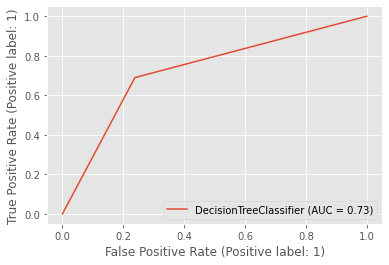

In [357]:
plot_roc_curve(dt, X_test, y_test)
plt.show()

The model is evaluated by limiting one of metrics(precision, recall)
And maximizing other

precision >= 0.8. recall -> max

Or using ROC_AUC curve can be used

Differtent metrics describing results of the prediction

# Gradient Boosting Classifier

In [358]:
import sklearn
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,random_state=42)
gbt.fit(X_train,y_train)

y_pred_GBC = gbt.predict(X_test)
print("The accuracy of Gradient Descent Classifier: ", accuracy_score(y_test, y_pred_GBC))

The accuracy of Gradient Descent Classifier:  0.79


accuracy_score:  0.79
f1_score:  0.823529411764706
recall_score:  0.8448275862068966
precision_score:  0.8032786885245902
----------------------------------------------
confusion_matrix: 
 


<AxesSubplot:>

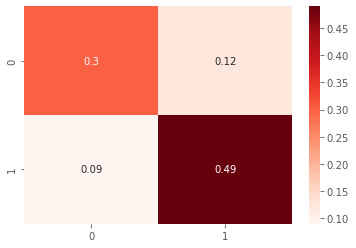

In [359]:
print ('accuracy_score: ',accuracy_score(y_test,y_pred_GBC))
print ('f1_score: ', f1_score(y_test,y_pred_GBC))
print ('recall_score: ',recall_score(y_test,y_pred_GBC))
print ('precision_score: ',precision_score(y_test,y_pred_GBC))
print ('----------------------------------------------')
print ('confusion_matrix: \n ')
cmGBC = confusion_matrix(y_test, y_pred_GBC)
sns.heatmap(cmGBC/np.sum(cmGBC), annot = True, cmap = 'Reds')

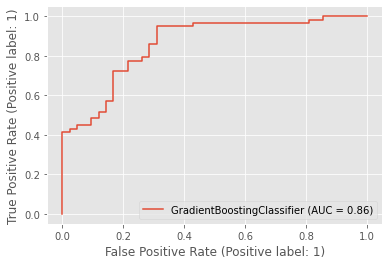

In [360]:
sklearn.metrics.plot_roc_curve(gbt, X_test, y_test)
plt.show()

# Random Forest

In [361]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=0.16)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300)

In [362]:
pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, pred_rf)
print(rf_acc)

0.8


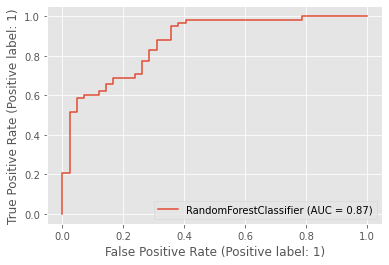

In [363]:
sklearn.metrics.plot_roc_curve(rf, X_test, y_test)
plt.show()

# Support Vector Machines

In [364]:
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.61


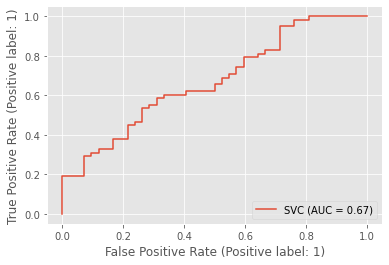

In [365]:
sklearn.metrics.plot_roc_curve(model_svm, X_test, y_test)
plt.show()

# Logistic Regression

In [366]:
from sklearn.linear_model import LogisticRegression

In [367]:
logreg = LogisticRegression()

In [368]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [369]:
y_pred_logreg = logreg.predict(X_test)

In [370]:
logreg_acc = accuracy_score(y_test,y_pred_logreg)
print("The accuracy of logreg: ", logreg_acc)

The accuracy of logreg:  0.82


accuracy_score:  0.82
f1_score:  0.847457627118644
recall_score:  0.8620689655172413
precision_score:  0.8333333333333334
----------------------------------------------
confusion_matrix: 
 


<AxesSubplot:>

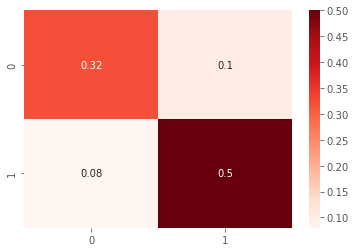

In [371]:
print ('accuracy_score: ',accuracy_score(y_test,y_pred_logreg))
print ('f1_score: ', f1_score(y_test,y_pred_logreg))
print ('recall_score: ',recall_score(y_test,y_pred_logreg))
print ('precision_score: ',precision_score(y_test,y_pred_logreg))
print ('----------------------------------------------')
print ('confusion_matrix: \n ')
cmGBC = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cmGBC/np.sum(cmGBC), annot = True, cmap = 'Reds')

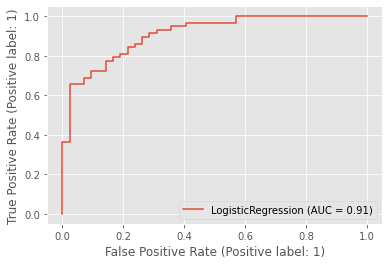

In [372]:
sklearn.metrics.plot_roc_curve(logreg, X_test, y_test)
plt.show()

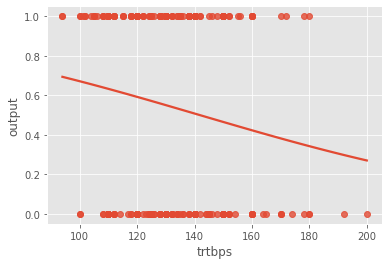

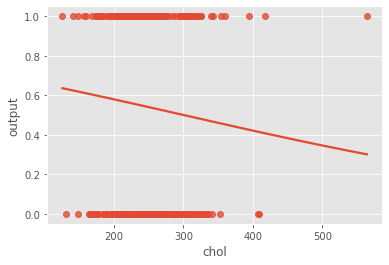

In [373]:
sns.regplot(x=df['trtbps'], y=df.output, data=df, logistic=True, ci=None)
plt.show()
sns.regplot(x=df['chol'], y=df.output, data=df, logistic=True, ci=None)
plt.show()

# K-Nearest Neighbor Classifier

In [374]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [375]:
y_pred_knn = knn.predict(X_test)

In [376]:
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_acc

0.57

accuracy_score:  0.57
f1_score:  0.6260869565217391
recall_score:  0.6206896551724138
precision_score:  0.631578947368421
----------------------------------------------
confusion_matrix: 
 


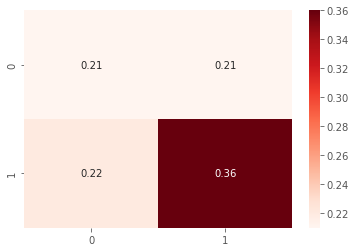

In [377]:
print ('accuracy_score: ',accuracy_score(y_test,y_pred_knn))
print ('f1_score: ', f1_score(y_test,y_pred_knn))
print ('recall_score: ',recall_score(y_test,y_pred_knn))
print ('precision_score: ',precision_score(y_test,y_pred_knn))
print ('----------------------------------------------')
print ('confusion_matrix: \n ')
cmGBC = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cmGBC/np.sum(cmGBC), annot = True, cmap = 'Reds')
plt.show()

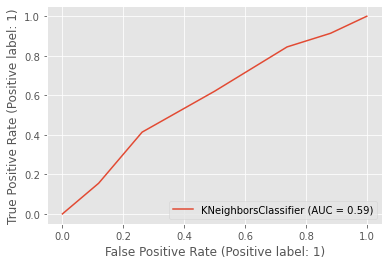

In [378]:
sklearn.metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

Lets try to balance data

First, split according to output

and concat after processing

In [379]:
df_1 = df[df.output == 1]
df_0 = df[df.output == 0]

df_1 = df_1.sample(frac=1)
df_0 = df_0.sample(frac=1)

opt_size_ = min(df_1.shape[0], df_0.shape[0])

df_processed = pd.concat([df_1.head(opt_size_), df_0.head(opt_size_)])
df_processed = df_processed.sample(frac=1)

In [380]:
df_processed

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


<AxesSubplot:xlabel='output', ylabel='count'>

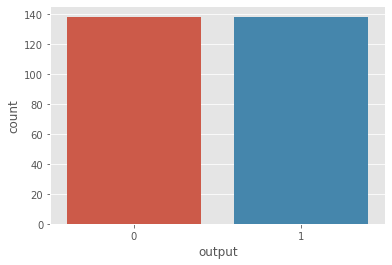

In [381]:
sns.countplot(df_processed['output'])

In [382]:
X_pr = df_processed.drop(['output'], axis=1)
y_pr = df_processed['output']
X_pr_train, X_pr_test, y_pr_train, y_pr_test = train_test_split(X_pr, y_pr, test_size=0.33, random_state=42)

In [383]:
y_pr_train

11     1
277    0
172    0
244    0
155    1
      ..
158    1
24     1
186    0
83     1
288    0
Name: output, Length: 184, dtype: int64

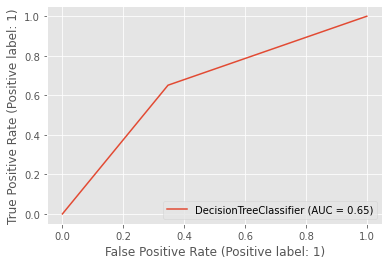

In [384]:
dt_pr = DecisionTreeClassifier()
dt_pr.fit(X_pr_train, y_pr_train)
plot_roc_curve(dt_pr, X_pr_test, y_pr_test)

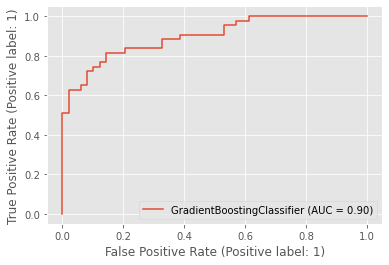

In [385]:
gbt_pr = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,random_state=42)
gbt_pr.fit(X_pr_train,y_pr_train)
plot_roc_curve(gbt_pr, X_pr_test, y_pr_test)

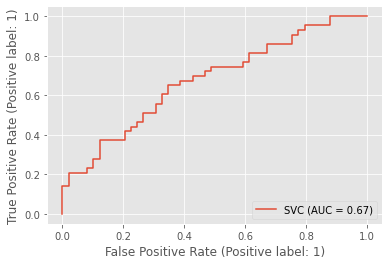

In [386]:
model_pr_svm = SVC(kernel='rbf', random_state = 42)
model_pr_svm.fit(X_pr_train, y_pr_train)
plot_roc_curve(model_pr_svm, X_pr_test, y_pr_test)

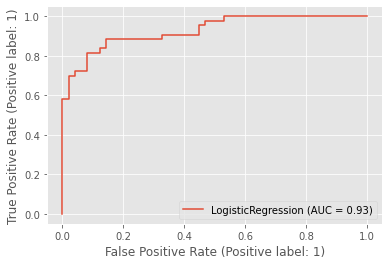

In [387]:
logreg_pr = LogisticRegression()
logreg_pr.fit(X_pr_train, y_pr_train)
plot_roc_curve(logreg_pr, X_pr_test, y_pr_test)

Comparing accuracy of models on df and df_processed

In [388]:
names = ['DecisionTree', 'GradientBoosting', 'SVM', 'LogisticRegression']
score_pr = [
    dt_pr.score(X_pr_test, y_pr_test),
    gbt_pr.score(X_pr_test, y_pr_test),
    model_pr_svm.score(X_pr_test, y_pr_test),
    logreg_pr.score(X_pr_test, y_pr_test)
]

score = [
    dt2.score(X_test, y_test),
    gbt.score(X_test, y_test),
    model_svm.score(X_test, y_test),
    logreg.score(X_test, y_test)
]

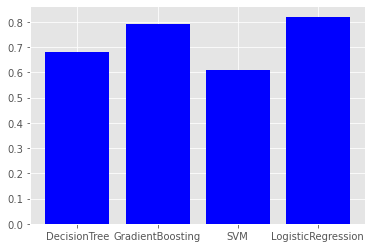

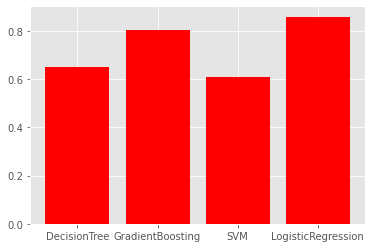

<BarContainer object of 4 artists>

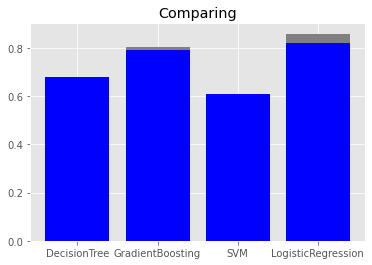

In [389]:
plt.bar(names, score, color='blue')
plt.show()
plt.bar(names, score_pr, color='red')
plt.show()
plt.title('Comparing')
plt.bar(names, score_pr, color='grey')
plt.bar(names, score, color='blue')

# 1) Balanced Data
As professor mentioned on my work at endterm, my data is unbalanced

So I tested to balance, get equal number of classes of each output

Looking at the score, some models predict better

It is obvious that, DecisionTree splits using 'entropy' or 'gini', etc

This metrics doesnt hardly depend on the balanced data or not

# 2) Show overfitting
plotting the tree(Decision tree numver 1) 

shows us that, it is easy to overfit with default parameters

So using cross - Validation, gives best parameters

And score is high too, of second tree